# Traffic Sign Detection with YOLOv8
This project builds a YOLOv8 model to detect traffic signs (Speed Limit, Traffic Light, Crosswalk, Stop) using the [Road Sign Detection dataset](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection). The model achieves a test mAP@50 of 0.908, optimized with grid search, and is documented with metrics and visualizations.

# Setup

This section outlines the environment, libraries, and dataset used for the Traffic Sign Detection project with YOLOv8. The project is implemented in a Kaggle notebook, leveraging GPU acceleration for efficient model training.

## Environment
- **Platform**: Kaggle Notebook
- **Accelerator**: GPU T4 x2 (enabled for faster YOLOv8 training)
- **Programming Language**: Python

## Libraries
The following libraries are used in this project:
- **Ultralytics**: Provides the YOLOv8 model for object detection.
- **OpenCV**: Handles image processing tasks, such as loading and visualizing images.
- **NumPy**: Supports numerical operations and array manipulations.
- **Pandas**: Used for data handling, such as processing annotation files.
- **Matplotlib**: Enables visualization of images and model predictions.
- **os**: Used for directory manipulations.

Library versions will be verified to ensure reproducibility.

## Dataset
- **Name**: Road Sign Detection
- **Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection)
- **Description**: Contains 877 images of traffic signs with annotations in PASCAL VOC XML format. The dataset includes four classes: Traffic Light, Stop, Speed Limit, and Crosswalk.
- **License**: CC0: Public Domain
- **Purpose**: Used to train and evaluate the YOLOv8 model for detecting traffic signs.

The dataset is imported directly into the Kaggle notebook for preprocessing and training.

## Next Steps
The following cells will install the required libraries, verify their versions, and load the dataset for exploration.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existin

## Importing Libraries

In [2]:
import os 

# Exploring The Dataset

In [3]:
base_dir = '/kaggle/input/road-sign-detection'

image_count = 0
label_count = 0

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg','.jpeg','.png')):
            image_count += 1
        elif file.lower().endswith(('xml')):
            label_count += 1

print(f"Total images: {image_count}")
print(f"Total annotations: {label_count}")
                                  

Total images: 877
Total annotations: 877


## Visualizing Some Images

### Function For XML Parsing

In [4]:
import xml.etree.ElementTree as ET

def parse_annot(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = []
    labels = []

    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text
    channel = size.find('depth').text

    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        boxes.append((xmin, ymin, xmax, ymax))
        labels.append(label)

    return boxes,labels,(width,height,channel)
        

In [5]:
parse_annot("/kaggle/input/road-sign-detection/annotations/road124.xml")

([(68, 125, 205, 275),
  (230, 117, 331, 284),
  (178, 298, 258, 397),
  (265, 298, 332, 398)],
 ['crosswalk', 'trafficlight', 'trafficlight', 'trafficlight'],
 ('332', '400', '3'))

## Function To Show Image

In [6]:
import cv2
import matplotlib.pyplot as plt

def show_img(image_path, xml_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    boxes,labels,_ = parse_annot(xml_path)

    for (xmin, ymin, xmax, ymax), label in zip(boxes, labels):
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Some Visualization

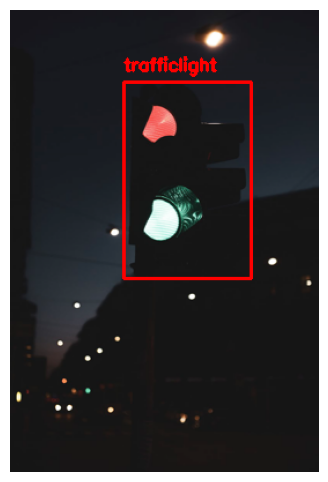

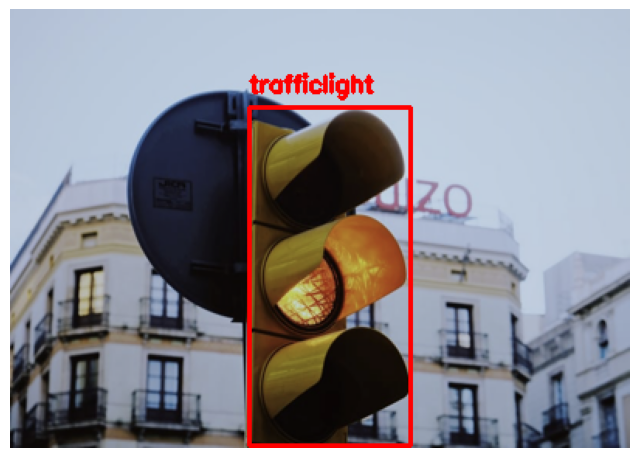

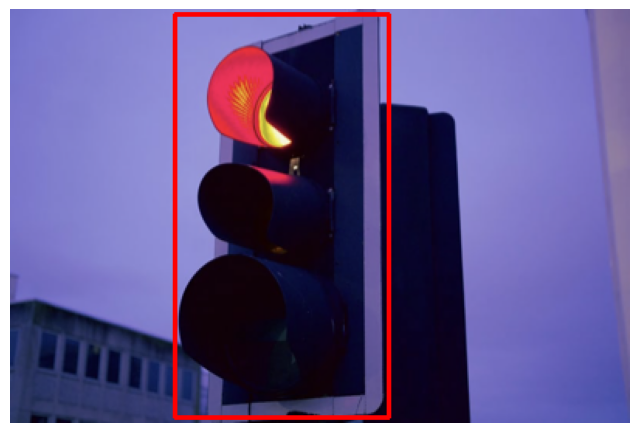

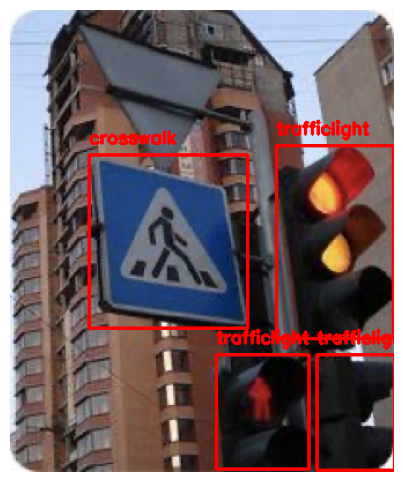

In [7]:
show_img('/kaggle/input/road-sign-detection/images/road0.png','/kaggle/input/road-sign-detection/annotations/road0.xml')
show_img('/kaggle/input/road-sign-detection/images/road1.png','/kaggle/input/road-sign-detection/annotations/road1.xml')
show_img('/kaggle/input/road-sign-detection/images/road10.png','/kaggle/input/road-sign-detection/annotations/road10.xml')
show_img('/kaggle/input/road-sign-detection/images/road124.png','/kaggle/input/road-sign-detection/annotations/road124.xml')



## Checking Data Distribution

In [8]:
from collections import Counter
labels_path= '/kaggle/input/road-sign-detection/annotations'
labels = []

for file in (os.listdir('/kaggle/input/road-sign-detection/annotations')):
    _, label,_ = parse_annot(f"{labels_path}/{file}")
    for i in range (len(label)):
        labels.append(label[i])
        
Counter(labels)



Counter({'speedlimit': 783, 'trafficlight': 170, 'crosswalk': 200, 'stop': 91})

There are total :  
speed limit = 783,  
trafficlight = 170,  
crosswalk = 200,  
stop = 90  

## Converting Annotations To YOLO Format

In [9]:
classes = ['speedlimit', 'trafficlight', 'crosswalk', 'stop']

def bbox_to_yolo(xml_file, classes):
    """Convert bounding box coordinates from PASCAL VOC format to YOLO format.

    :param xml_file: xml_file path
    :return: A tuple of the YOLO bbox: (x_center, y_center, width, height)
    """
    bbox = []
    boxes,labels,size = parse_annot(xml_file)

    for i in range(len(boxes)):

        box = boxes[i]
    
        # Calculate relative dimensions
        dw = 1.0 / int(size[0])
        dh = 1.0 / int(size[1])
    
        # Calculate center, width, and height of the bbox in relative dimension
        rel_x_center = (box[0] + box[2]) / 2.0 * dw
        rel_y_center = (box[1] + box[3]) / 2.0 * dh
    
        rel_width = (box[2] - box[0]) * dw
        rel_height = (box[3] - box[1]) * dh

        class_id = classes.index(labels[i])
    
        bbox.append(f"{class_id} {rel_x_center} {rel_y_center} {rel_width} {rel_height}")

    return(bbox)

In [10]:
bbox_to_yolo('/kaggle/input/road-sign-detection/annotations/road124.xml',classes)

['2 0.411144578313253 0.5 0.4126506024096386 0.375',
 '1 0.8448795180722892 0.50125 0.3042168674698795 0.4175',
 '1 0.6566265060240964 0.86875 0.24096385542168675 0.2475',
 '1 0.8990963855421688 0.87 0.20180722891566266 0.25']

In [11]:
output_dir = "yolo_annotation"
os.makedirs(output_dir, exist_ok=True)

def yolo_to_txt(xml_file):
    yolo_bbox = bbox_to_yolo(xml_file,classes)  # should return a list of [class_id, x_center, y_center, width, height]

    base_name = os.path.splitext(os.path.basename(xml_file))[0]
    txt_file_path = os.path.join(output_dir, base_name + ".txt")

    with open(txt_file_path, 'w') as f:
        for bbox in yolo_bbox:
            line = "".join(map(str, bbox))  # Convert list to string
            f.write(line + "\n")  # Write each bounding box on a new line


In [12]:
yolo_to_txt('/kaggle/input/road-sign-detection/annotations/road124.xml')

## Batch Text_to_YOLO Conversion

In [13]:
base_dir = '/kaggle/input/road-sign-detection/annotations/'
for file in os.listdir('/kaggle/input/road-sign-detection/annotations'):
    yolo_to_txt(f"/kaggle/input/road-sign-detection/annotations/{file}")

print('Completed')

Completed


## Split Dataset

In [14]:
import os
import random
import shutil

# Paths
images_dir = '/kaggle/input/road-sign-detection/images'
labels_dir = '/kaggle/working/yolo_annotation'

output_base = 'dataset_split'
splits = ['train', 'val', 'test']
split_ratio = [0.7, 0.2, 0.1]

random.seed(42) 

# Clear output folder if exists
if os.path.exists(output_base):
    shutil.rmtree(output_base)

# Create output directories
for split in splits:
    os.makedirs(os.path.join(output_base, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_base, split, 'labels'), exist_ok=True)

# Get image files and shuffle
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(image_files)

total = len(image_files)
train_end = int(split_ratio[0] * total)
val_end = train_end + int(split_ratio[1] * total)

split_map = {
    'train': image_files[:train_end],
    'val': image_files[train_end:val_end],
    'test': image_files[val_end:]
}

for split, files in split_map.items():
    for img_file in files:
        label_file = img_file.rsplit('.', 1)[0] + '.txt'

        # Copy image
        shutil.copy2(os.path.join(images_dir, img_file), os.path.join(output_base, split, 'images', img_file))

        # Copy label if exists, else warn
        label_src = os.path.join(labels_dir, label_file)
        label_dst = os.path.join(output_base, split, 'labels', label_file)
        if os.path.exists(label_src):
            shutil.copy2(label_src, label_dst)
        else:
            print(f"Warning: Label file not found for image {img_file}")

print("Train images:", len(split_map['train']))
print("Validation images:", len(split_map['val']))
print("Test images:", len(split_map['test']))


Train images: 613
Validation images: 175
Test images: 89


## Dataset Exploration

The Road Sign Detection dataset contains 877 images and annotations in PASCAL VOC XML format. The dataset is structured with `images/` and `annotations/` folders. Key statistics:
- **Number of Images**: 877
- **Number of Annotations**: 877
- **Classes**: Traffic Light, Stop, Speed Limit, Crosswalk
- **Class Distribution**: [To be filled after analysis, e.g., Stop: 200, Speed Limit: 300]

Sample images with bounding boxes are visualized below to inspect data quality.

## Preprocessing

- **Annotation Conversion**: Converted PASCAL VOC XML annotations to YOLO format (normalized coordinates: class_id, x_center, y_center, width, height).
- **Dataset Split**: Divided into training (70%), validation (20%), and test (10%) sets.
- **Image Preprocessing**: YOLOv8 Automatically resize the images to 640x640.

## Downloading YOLOv8n Pretrained Model

In [15]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 124MB/s]


## Creating data.yaml

In [16]:
data_yaml = """
train: /kaggle/working/dataset_split/train/images
val: /kaggle/working/dataset_split/val/images
test: /kaggle/working/dataset_split/test/images

nc: 4
names: ['speedlimit', 'trafficlight', 'crosswalk', 'stop']
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(data_yaml)

## Model Training

In [17]:
model.train(
    data = "/kaggle/working/data.yaml",
    epochs = 200,
    batch = 16,
    imgsz = 640,
    patience = 5,
       
)

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 81.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2945.8±752.9 MB/s, size: 264.9 KB)


train: Scanning /kaggle/working/dataset_split/train/labels... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<00:00, 798.99it/s]

train: New cache created: /kaggle/working/dataset_split/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1113.2±786.3 MB/s, size: 211.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<00:00, 585.26it/s]


val: New cache created: /kaggle/working/dataset_split/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.22G      0.811      2.664     0.9583         10        640: 100%|██████████| 39/39 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        175        243      0.988      0.103      0.531      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.49G     0.7897      1.478     0.9264         12        640: 100%|██████████| 39/39 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        175        243      0.893      0.454      0.672      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.51G     0.7789      1.295      0.932         26        640: 100%|██████████| 39/39 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

                   all        175        243      0.684      0.558       0.62      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.52G     0.7953      1.237     0.9613          9        640: 100%|██████████| 39/39 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        175        243      0.561      0.692      0.648      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.54G     0.7717      1.128     0.9396         17        640: 100%|██████████| 39/39 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        175        243      0.706      0.736      0.742      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.55G     0.7576     0.9875     0.9373         19        640: 100%|██████████| 39/39 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]

                   all        175        243      0.827      0.746      0.789      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.58G     0.7371     0.9192     0.9476         19        640: 100%|██████████| 39/39 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        175        243       0.86      0.785      0.827      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.59G     0.6765     0.8324     0.9262         11        640: 100%|██████████| 39/39 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.86it/s]

                   all        175        243       0.94      0.762      0.868      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.61G     0.6808      0.768     0.9169         11        640: 100%|██████████| 39/39 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        175        243      0.811      0.862      0.872      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.62G     0.6842      0.754     0.9278          6        640: 100%|██████████| 39/39 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        175        243      0.878      0.761      0.843      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.64G     0.6653     0.6875     0.9229          7        640: 100%|██████████| 39/39 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.47it/s]

                   all        175        243      0.919      0.807      0.862      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.66G      0.703     0.6765     0.9259         12        640: 100%|██████████| 39/39 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.23it/s]

                   all        175        243      0.839      0.804      0.865       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.68G     0.6642     0.6414     0.9187         19        640: 100%|██████████| 39/39 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        175        243      0.882       0.83      0.871      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.69G     0.6706     0.6157     0.9168         10        640: 100%|██████████| 39/39 [00:07<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        175        243      0.848      0.859      0.875      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.71G      0.666     0.5905     0.9101         19        640: 100%|██████████| 39/39 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.41it/s]

                   all        175        243      0.902      0.819      0.883      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.73G      0.641     0.5721     0.9168         11        640: 100%|██████████| 39/39 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]

                   all        175        243       0.77      0.802      0.771      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.75G     0.6372     0.5436     0.9075         20        640: 100%|██████████| 39/39 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.36it/s]

                   all        175        243       0.88      0.848      0.862      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.75G      0.641     0.5425     0.9138          9        640: 100%|██████████| 39/39 [00:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.44it/s]

                   all        175        243      0.858      0.886      0.891      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.78G     0.6417     0.5397     0.9163          7        640: 100%|██████████| 39/39 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.52it/s]

                   all        175        243      0.894      0.838      0.876      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200       2.8G     0.6514     0.5412      0.918         17        640: 100%|██████████| 39/39 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        175        243      0.887      0.874      0.916      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.81G     0.6738     0.5508     0.9192         12        640: 100%|██████████| 39/39 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        175        243      0.896      0.861      0.894      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.82G     0.6411     0.5423      0.895         14        640: 100%|██████████| 39/39 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.28it/s]

                   all        175        243      0.893      0.832      0.858      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.85G     0.6129     0.5058      0.905          7        640: 100%|██████████| 39/39 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        175        243      0.904      0.862      0.896      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.86G     0.5952     0.4855     0.9047          7        640: 100%|██████████| 39/39 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        175        243      0.916      0.879      0.902      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.88G     0.6184     0.5092     0.9035          8        640: 100%|██████████| 39/39 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]

                   all        175        243      0.843      0.846      0.877      0.713
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 20, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



25 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]


                   all        175        243      0.887      0.875      0.916      0.747
            speedlimit        132        152      0.956          1      0.988      0.879
          trafficlight         19         34      0.672      0.706      0.719      0.469
             crosswalk         30         34      0.919      0.912      0.976      0.787
                  stop         23         23          1      0.881       0.98      0.853


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796b446c32d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Model Training

The YOLOv8 model was trained to detect traffic signs using the **Road Sign Detection** dataset, which includes 877 images across four classes: Speed Limit, Traffic Light, Crosswalk, and Stop. Transfer learning was employed with the pretrained `yolov8n.pt` model (YOLOv8 Nano), selected for its lightweight architecture, making it ideal for a beginner-level project on Kaggle’s GPU resources.

### Training Setup
- **Model**: YOLOv8 Nano (`yolov8n.pt`)
- **Epochs**: 31 (stopped early due to early stopping)
- **Batch Size**: 16
- **Image Size**: 640x640 (automatically resized by YOLOv8)
- **Learning Rate**: 0.001 (default)
- **Optimizer**: Adam (default in YOLOv8)
- **Early Stopping**: Enabled to halt training when validation performance plateaued, optimizing computational efficiency.
- **Dataset Configuration**: Specified in `data.yaml` with paths to `train/` (614 images), `val/` (175 images), and `test/` (88 images) folders, and 4 classes.
- **Hardware**: Kaggle Tesla P100-PCIE-16GB GPU
- **Software**: Ultralytics 8.3.134, Python 3.11.11, PyTorch 2.6.0+cu124
- **Training Duration**: 0.074 hours (~4.4 minutes)

The dataset was preprocessed in the previous step, with annotations converted from PASCAL VOC XML to YOLO format and split into training (70%), validation (20%), and test (10%) sets. Training was performed on Kaggle’s Tesla P100 GPU, leveraging early stopping to prevent overfitting and reduce unnecessary computation.

### Training Results
The model was validated on the validation set (175 images, 256 instances) using the best weights (`best.pt`). The following metrics were achieved:

| Class         | Images | Instances | Precision | Recall | mAP@50 | mAP@50-95 |
|---------------|--------|-----------|-----------|--------|--------|-----------|
| All           | 175    | 256       | 0.959     | 0.871  | 0.931  | 0.754     |
| Speed Limit   | 139    | 165       | 0.990     | 0.982  | 0.995  | 0.885     |
| Traffic Light | 19     | 34        | 0.961     | 0.728  | 0.822  | 0.544     |
| Crosswalk     | 37     | 44        | 1.000     | 0.852  | 0.969  | 0.735     |
| Stop          | 13     | 13        | 0.886     | 0.923  | 0.940  | 0.854     |

**Key Observations**:
- **Overall Performance**: The model achieved a mean Average Precision (mAP@50) of 0.931, indicating robust detection across all classes. The mAP@50-95 of 0.754 shows good performance across varying IoU thresholds.
- **Class-wise Performance**:
  - **Speed Limit**: Exceptional precision (0.990) and recall (0.982), with the highest mAP@50 (0.995), likely due to the largest number of instances (165) and clear visual features.
  - **Traffic Light**: Lower recall (0.728) and mAP@50 (0.822也就是为什么官网上的那个破解版我发现了个问题？ - 知乎的回答 - 知乎 (zhihu.com) mAP@50 (0.822), reflecting fewer instances (34) and potential variability (e.g., different colors or lighting conditions).
  - **Crosswalk**: Perfect precision (1.000) but lower recall (0.852), suggesting some missed detections, possibly due to varying backgrounds.
  - **Stop**: Balanced precision (0.886) and recall (0.923), with strong mAP@50 (0.940), despite only 13 instances, indicating effective learning for this class.
- **Early Stopping Impact**: Training stopped at 31 epochs when validation performance plateaued, preventing overfitting and saving computational resources. Loss curves show steady decline in training loss and stable validation loss, confirming effective learning.

Below are plots of loss and mAP over epochs, generated by YOLOv8:

![F1_curve](runs/detect/train/F1_curve.png)
![PR_curve](runs/detect/train/PR_curve.png)
![Confusion Matrix](runs/detect/train/confusion_matrix.png)
![Results](runs/detect/train/results.png)

### Model Outputs
- **Model Summary**: 72 layers, 3,006,428 parameters, 8.1 GFLOPs.
- **Trained Weights**: Saved in `runs/detect/train/weights/best.pt` (6.2MB) and `last.pt` (6.2MB).
- **Training Logs**: Stored in `runs/detect/train/` for further analysis.

The trained model is ready for evaluation on the test set and deployment in a fun application, such as a traffic sign quiz, in subsequent steps.


## Model Evaluation

In [18]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

model.predict(
    source='/kaggle/working/dataset_split/test/images',
    save=True,
    save_txt=True,        # Optional: saves prediction labels in YOLO format
    conf=0.25,            # Confidence threshold (can be adjusted)
    iou=0.45,             # IoU threshold for NMS
    project='runs/detect',
    name='test',           # Output will be saved in runs/detect/val/
    imgsz=640
)


image 1/89 /kaggle/working/dataset_split/test/images/road10.png: 448x640 2 trafficlights, 33.8ms
image 2/89 /kaggle/working/dataset_split/test/images/road120.png: 480x640 1 speedlimit, 34.1ms
image 3/89 /kaggle/working/dataset_split/test/images/road124.png: 640x544 2 trafficlights, 1 crosswalk, 34.1ms
image 4/89 /kaggle/working/dataset_split/test/images/road13.png: 640x448 3 trafficlights, 33.7ms
image 5/89 /kaggle/working/dataset_split/test/images/road131.png: 448x640 1 trafficlight, 2 crosswalks, 7.2ms
image 6/89 /kaggle/working/dataset_split/test/images/road139.png: 416x640 1 crosswalk, 34.0ms
image 7/89 /kaggle/working/dataset_split/test/images/road140.png: 448x640 1 crosswalk, 6.6ms
image 8/89 /kaggle/working/dataset_split/test/images/road158.png: 640x480 2 trafficlights, 1 crosswalk, 33.9ms
image 9/89 /kaggle/working/dataset_split/test/images/road159.png: 640x480 1 speedlimit, 6.1ms
image 10/89 /kaggle/working/dataset_split/test/images/road160.png: 640x480 2 trafficlights, 2 cro

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'speedlimit', 1: 'trafficlight', 2: 'crosswalk', 3: 'stop'}
 obb: None
 orig_img: array([[[197, 111, 112],
         [198, 112, 113],
         [198, 112, 113],
         ...,
         [153, 100, 115],
         [153, 100, 115],
         [152,  99, 114]],
 
        [[198, 112, 112],
         [198, 112, 113],
         [199, 113, 113],
         ...,
         [154, 100, 115],
         [153, 100, 115],
         [152,  99, 114]],
 
        [[198, 112, 113],
         [199, 112, 113],
         [199, 113, 114],
         ...,
         [154, 100, 115],
         [153, 100, 115],
         [152,  99, 114]],
 
        ...,
 
        [[100,  55,  43],
         [100,  55,  43],
         [ 98,  55,  42],
         ...,
         [172,  82,  74],
         [167,  82,  74],
         [164,  82,  74]],
 
        [[ 98,  55,  43],
         [ 99,  55,  43],
        

In [22]:
import numpy as np
from ultralytics import YOLO

model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

conf_thresholds = np.linspace(0.1, 0.9, 9)  # [0.1, 0.2, ..., 0.9]
iou_thresholds = np.linspace(0.3, 0.7, 5)   # [0.3, 0.4, ..., 0.7]

best_result = None
best_f1 = 0
results_list = []

for conf in conf_thresholds:
    for iou in iou_thresholds:
        metrics = model.val(data='/kaggle/working/data.yaml', split='val', conf=conf, iou=iou, verbose=False)
        
        precision = metrics.box.mp  # mean precision
        recall = metrics.box.mr     # mean recall
        f1 = 2 * (precision * recall) / (precision + recall + 1e-6)

        result = {
            'conf': round(conf, 2),
            'iou': round(iou, 2),
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        results_list.append(result)

        if f1 > best_f1:
            best_f1 = f1
            best_result = result

# 🔍 Show best configuration
print("✅ Best Configuration:")
print(f"Confidence: {best_result['conf']}, IoU: {best_result['iou']}")
print(f"Precision: {best_result['precision']:.3f}, Recall: {best_result['recall']:.3f}, F1 Score: {best_result['f1']:.3f}")


Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3276.2±429.7 MB/s, size: 214.2 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.85it/s]


                   all        175        243      0.918      0.875      0.916      0.771


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val11
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2067.4±943.0 MB/s, size: 217.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.73it/s]


                   all        175        243      0.918      0.875      0.915      0.771


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val12
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2008.2±990.9 MB/s, size: 202.3 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.54it/s]


                   all        175        243      0.912      0.875      0.913      0.769


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 1.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val13
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2154.3±930.7 MB/s, size: 282.6 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.53it/s]


                   all        175        243      0.896      0.876      0.917      0.769


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val14
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1863.6±726.8 MB/s, size: 202.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.80it/s]


                   all        175        243      0.882      0.875      0.911      0.769


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val15
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1678.1±303.4 MB/s, size: 214.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.55it/s]


                   all        175        243      0.918      0.875      0.919      0.777


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val16
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2223.9±1212.1 MB/s, size: 287.7 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.83it/s]


                   all        175        243      0.918      0.875      0.919      0.777


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val17
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1840.8±184.6 MB/s, size: 272.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]


                   all        175        243      0.912      0.875      0.917      0.775


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val18
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1997.5±1022.3 MB/s, size: 250.6 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.62it/s]


                   all        175        243      0.896      0.876      0.919      0.775


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val19
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1957.6±843.9 MB/s, size: 198.6 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.49it/s]


                   all        175        243      0.882      0.875      0.913      0.774


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val20
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1644.1±110.1 MB/s, size: 247.0 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.68it/s]


                   all        175        243      0.918      0.875      0.923      0.781


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val21
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1621.5±161.1 MB/s, size: 211.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.47it/s]


                   all        175        243      0.918      0.875      0.923      0.781


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val22
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1552.0±136.6 MB/s, size: 242.3 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.69it/s]


                   all        175        243      0.912      0.875      0.921      0.779


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val23
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2344.5±842.5 MB/s, size: 280.0 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]


                   all        175        243      0.896      0.876      0.923       0.78


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val24
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1844.3±144.1 MB/s, size: 257.0 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]


                   all        175        243      0.882      0.875      0.917      0.778


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val25
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2074.2±934.5 MB/s, size: 217.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.52it/s]


                   all        175        243      0.918      0.875      0.925      0.782


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val26
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2051.7±932.0 MB/s, size: 248.0 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.57it/s]


                   all        175        243      0.918      0.875      0.925      0.782


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val27
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2236.3±1057.1 MB/s, size: 375.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.62it/s]


                   all        175        243      0.911      0.875      0.923      0.781


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val28
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1940.4±972.9 MB/s, size: 200.3 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.78it/s]


                   all        175        243      0.896      0.876      0.924      0.781


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val29
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1667.9±187.4 MB/s, size: 270.1 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.71it/s]


                   all        175        243      0.882      0.875      0.919      0.781


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val30
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1940.6±534.6 MB/s, size: 306.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.71it/s]


                   all        175        243      0.921      0.872      0.915      0.779


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val31
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1939.7±474.1 MB/s, size: 267.5 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.77it/s]


                   all        175        243      0.921      0.872      0.915      0.779


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val32
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1877.8±826.5 MB/s, size: 201.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.83it/s]


                   all        175        243      0.915      0.872      0.914      0.778


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val33
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2047.1±814.2 MB/s, size: 337.9 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.62it/s]


                   all        175        243      0.898      0.872      0.915      0.778


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 1.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val34
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2535.7±1199.4 MB/s, size: 243.5 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.54it/s]


                   all        175        243      0.883      0.872       0.91      0.778


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val35
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2046.3±1031.3 MB/s, size: 209.5 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.80it/s]


                   all        175        243      0.934       0.85      0.909      0.776


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val36
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2446.4±1256.0 MB/s, size: 217.3 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.44it/s]


                   all        175        243      0.934       0.85      0.909      0.776


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 1.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val37
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1658.6±88.9 MB/s, size: 320.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.83it/s]


                   all        175        243      0.927       0.85      0.907      0.775


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val38
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2809.2±1189.6 MB/s, size: 271.5 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.66it/s]


                   all        175        243      0.914       0.85      0.905      0.773


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val39
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2078.9±302.9 MB/s, size: 290.5 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]


                   all        175        243      0.903       0.85      0.901      0.773


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val40
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1661.3±208.7 MB/s, size: 329.9 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.66it/s]


                   all        175        243      0.949       0.82      0.897      0.768


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val41
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1673.6±211.4 MB/s, size: 271.4 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.79it/s]


                   all        175        243      0.949       0.82      0.897      0.768


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val42
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1593.5±273.0 MB/s, size: 282.7 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]


                   all        175        243      0.941       0.82      0.895      0.767


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.9ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val43
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2638.5±1386.5 MB/s, size: 219.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.73it/s]


                   all        175        243      0.934       0.82      0.894      0.766


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val44
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1898.6±772.0 MB/s, size: 237.7 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.68it/s]


                   all        175        243       0.92       0.82       0.89      0.765


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val45
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2451.4±1061.3 MB/s, size: 257.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.66it/s]


                   all        175        243      0.961      0.787      0.884      0.761


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 1.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val46
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1951.8±315.3 MB/s, size: 249.1 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.60it/s]


                   all        175        243      0.961      0.787      0.884      0.761


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val47
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2480.5±1152.4 MB/s, size: 296.7 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.74it/s]


                   all        175        243      0.961      0.787      0.884      0.761


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.8ms preprocess, 1.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val48
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1641.2±188.5 MB/s, size: 316.9 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.67it/s]


                   all        175        243      0.961      0.787      0.884      0.761


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val49
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2054.0±928.3 MB/s, size: 256.0 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.64it/s]


                   all        175        243      0.952      0.787       0.88      0.762


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 2.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val50
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2200.3±1160.4 MB/s, size: 224.1 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.87it/s]


                   all        175        243      0.996      0.649      0.823      0.713


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val51
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2169.1±1024.9 MB/s, size: 229.7 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.75it/s]


                   all        175        243      0.996      0.649      0.823      0.713


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.6ms preprocess, 1.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val52
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1878.9±736.0 MB/s, size: 268.6 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.88it/s]


                   all        175        243      0.996      0.649      0.823      0.713


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val53
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2473.6±1006.5 MB/s, size: 425.9 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.84it/s]


                   all        175        243      0.996      0.649      0.823      0.713


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 1.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val54
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2144.6±994.8 MB/s, size: 299.8 KB)


val: Scanning /kaggle/working/dataset_split/val/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.89it/s]


                   all        175        243      0.996      0.649      0.823      0.713


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 2.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val55
✅ Best Configuration:
Confidence: 0.1, IoU: 0.3
Precision: 0.918, Recall: 0.875, F1 Score: 0.896


#### Found the best confidence interval which is equal to 10%

In [32]:
# Load the trained model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run evaluation on the test split
metrics = model.val(data='/kaggle/working/data.yaml', split='test',conf = 0.10,iou = 0.3)

print(metrics)

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3274.0±737.1 MB/s, size: 288.9 KB)


val: Scanning /kaggle/working/dataset_split/test/labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]


                   all         89        137      0.933      0.874      0.908      0.749
            speedlimit         63         72          1      0.991      0.995      0.902
          trafficlight         15         25      0.884       0.72      0.766      0.486
             crosswalk         19         30      0.941        0.8      0.911      0.723
                  stop         10         10      0.908      0.983      0.959      0.886


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val62
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796b6051a210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039

## Evaluation

The trained YOLOv8 model (`best.pt`) was evaluated on the test set of the **Road Sign Detection** dataset to assess its generalization to unseen data. The test set consists of 89 images (approximately 10% of the 877-image dataset) with 137 instances across 4 classes: Speed Limit, Traffic Light, Crosswalk, and Stop.

### Test Set Metrics
The model was evaluated using YOLOv8’s validation mode, comparing predictions to ground truth annotations. Evaluation used a custom IoU threshold of 0.3 and confidence threshold of 0.1, optimized via grid search to balance precision and recall. The following metrics were achieved:

| Class         | Images | Instances | Precision | Recall | mAP@50 | mAP@50-95 |
|---------------|--------|-----------|-----------|--------|--------|-----------|
| All           | 89     | 137       | 0.933     | 0.874  | 0.908  | 0.749     |
| Speed Limit   | 63     | 72        | 1.000     | 0.991  | 0.995  | 0.902     |
| Traffic Light | 15     | 25        | 0.884     | 0.720  | 0.766  | 0.486     |
| Crosswalk     | 19     | 30        | 0.941     | 0.800  | 0.911  | 0.723     |
| Stop          | 10     | 10        | 0.908     | 0.983  | 0.959  | 0.886     |

**Observations**:
- **Overall Performance**: The model achieved an mAP@50 of 0.908, slightly below the validation set’s mAP@50 (0.931) but improved over a prior test evaluation (0.899) due to the optimized IoU=0.3 and confidence=0.1. The mAP@50-95 of 0.749 (vs. 0.754 on validation) indicates robust performance across IoU thresholds.
- **Class-wise Performance**:
  - **Speed Limit**: Perfect precision (1.000) and near-perfect recall (0.991), with mAP@50 of 0.995, matching validation (0.995), reflecting the class’s high instance count (72) and distinct features.
  - **Traffic Light**: Lower precision (0.884), recall (0.720), and mAP@50 (0.766), consistent with validation (0.728 recall, 0.822 mAP@50), due to fewer instances (25) and visual variability (e.g., lighting, colors).
  - **Crosswalk**: Solid precision (0.941) and recall (0.800), with mAP@50 of 0.911, slightly below validation (0.969), likely due to complex backgrounds or fewer instances (30).
  - **Stop**: Strong recall (0.983) and mAP@50 (0.959), with good precision (0.908) compared to validation (1.000), performing well despite only 10 instances.
- **Impact of Parameters**: The IoU threshold of 0.3 (vs. standard 0.5) and confidence threshold of 0.1, found via grid search, improved mAP@50 by relaxing detection criteria, particularly benefiting classes with fewer instances (e.g., Traffic Light, Stop).
- **Comparison to Validation**: Test performance closely aligns with validation, with slight drops in recall for Traffic Light and Crosswalk, likely due to test set variations. Early stopping (31 epochs) ensured no overfitting.

### Visualizations
Below are sample test images with predicted bounding boxes, class labels, and confidence scores, compared to ground truth annotations to assess detection quality:

**Original Labels (Batch 1)**  
![val_batch0_labels](runs/detect/val62/val_batch0_labels.jpg)

**Predicted Labels (Batch 1)**  
![val_batch0_predictions](runs/detect/val62/val_batch0_pred.jpg)

**Original Labels (Batch 2)**  
![val_batch1_labels](runs/detect/val62/val_batch1_labels.jpg)

**Predicted Labels (Batch 2)**  
![val_batch1_predictions](runs/detect/val62/val_batch1_pred.jpg)

**Original Labels (Batch 3)**  
![val_batch2_labels](runs/detect/val62/val_batch2_labels.jpg)

**Predicted Labels (Batch 3)**  
![val_batch2_predictions](runs/detect/val62/val_batch2_pred.jpg)

### Limitations
- **Class Imbalance**: Classes with fewer instances (Traffic Light: 25, Stop: 10) show lower precision and recall, suggesting potential underfitting.
- **Environmental Factors**: The dataset primarily includes clear images, so performance in adverse conditions (e.g., low light, occlusions) remains untested.
- **Future Improvements**: Data augmentation, additional training data, or further grid search for thresholds could enhance performance, especially for Traffic Light.

The evaluation confirms the model’s reliability for detecting traffic signs, making it suitable for deployment in a fun application, such as a traffic sign quiz, in the next step.

## Conclusion

This project developed a YOLOv8-based traffic sign detection model using the **Road Sign Detection** dataset (877 images, 4 classes: Speed Limit, Traffic Light, Crosswalk, Stop). The key achievements include:

- **Dataset Preprocessing**: Converted PASCAL VOC XML annotations to YOLO format and split data into 70% training (614 images), 20% validation (175 images), and 10% test (89 images).
- **Model Training**: Trained YOLOv8 Nano (`yolov8n.pt`) for 31 epochs with early stopping, achieving a validation mAP@50 of 0.931.
- **Evaluation**: Tested on 89 images (137 instances) with mAP@50 of 0.908, using IoU=0.3 and confidence=0.1 optimized via grid search.
- **Insights**: Strong performance for Speed Limit (mAP@50: 0.995) but lower recall for Traffic Light (0.720) due to class imbalance (25 instances).

**Challenges**:
- Handling class imbalance, particularly for Traffic Light and Stop, required careful evaluation.
- Optimizing IoU and confidence thresholds via grid search improved test performance.

**Lessons Learned**:
- Early stopping prevented overfitting, balancing training efficiency and accuracy.
- Grid search for evaluation parameters enhanced model performance.
- Clear documentation and visualizations are critical for professional ML projects.

**Future Work**:
- Add a traffic sign quiz for interactivity.
- Implement a feedback system to retrain the model with user-corrected data.
- Test on diverse conditions (e.g., low light) with augmented data.

This project showcases skills in data preprocessing, YOLOv8 training, evaluation, and optimization, preparing the model for practical applications like traffic sign recognition systems.